<a href="https://colab.research.google.com/github/obeabi/Flight_Cancellation/blob/main/Main_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
# SDS Challenge #1 - Flight Cancellations
## 2020-12-19

## Stage 2: Feature Engineering and Selection

## Problem Statement
I have been hired by the US Department of Transportation (DOT) to analyze data from multiple airline carriers in the United States. The DOT wants to help airline carriers reduce the number of flight cancellations and improve travelers' experiences. My job is to help the DOT predict whether or not a flight will be canceled based on the data provided.

In [49]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install imbalanced-learn
!pip install category_encoders
import category_encoders as ce

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)

Libraries installed successfully!


In [50]:
# Importing the dataset and check the shape and total number of missing values

df_train = pd.read_csv('Clean_train.csv', engine= 'python', encoding= 'latin1')
df_test = pd.read_csv('Clean_test.csv', engine = 'python', encoding ='latin1')

df_train.head()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,205.0,1448,430,0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,280.0,2330,750,0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,286.0,2296,806,0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,285.0,2342,805,0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,235.0,1448,320,0


In [51]:
# print column names
df_train.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'CANCELLED'],
      dtype='object')

In [52]:
# drop column "Unamed"

df_train.drop(columns= 'Unnamed: 0', axis = 1, inplace= True)

df_train.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,205.0,1448,430,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,280.0,2330,750,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,286.0,2296,806,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,285.0,2342,805,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,235.0,1448,320,0


In [53]:
# Inspect test set dataframe
df_test.columns


Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL'],
      dtype='object')

In [54]:
# drop column "Unamed: 0"

df_test.drop(columns= 'Unnamed: 0', axis = 1, inplace= True)

df_test.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,2015,2,25,3,WN,1046,N731SA,LAS,PHX,700,65,255,905
1,2015,2,25,3,WN,2251,N279WN,LAS,RNO,700,80,345,820
2,2015,2,25,3,WN,857,N277WN,LAS,SMF,700,90,397,830
3,2015,2,25,3,WN,2864,N8632A,LAX,BWI,700,295,2329,1455
4,2015,2,25,3,WN,3220,N8659D,LAX,PHX,700,80,370,920


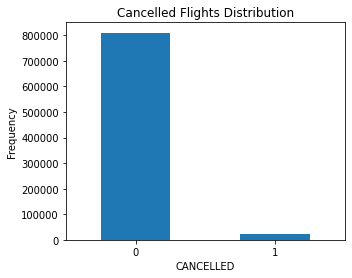

In [55]:
# Let's visualize the distribution of data
count_classes = pd.value_counts(df_train['CANCELLED'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Cancelled Flights Distribution")
plt.xticks(range(2))
plt.xlabel("CANCELLED")
plt.ylabel('Frequency')
plt.show()

In [56]:
# gET THE CANCELLED AND NOT CANCEELED FLIFGTS
Cancelled = df_train[df_train['CANCELLED']== 1]
notCancelled = df_train[df_train['CANCELLED']== 0]

print(Cancelled.shape, notCancelled.shape)

(22701, 14) (810176, 14)


In [57]:
# Print dataframe statistics

df_train.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED
count,832877.0,832877.000000,832877.000000,832877.000000,832877.000000,832877.000000,832877.000000,832877.000000,832877.000000,832877.000000
mean,2015.0,1.439070,14.430232,3.939077,2268.461972,1323.100787,139.944058,800.685110,1506.587294,0.027256
std,0.0,0.496274,8.269950,1.995616,1803.899074,468.976270,74.518837,593.237961,484.175501,0.162829
min,2015.0,1.000000,1.000000,1.000000,1.000000,5.000000,20.000000,31.000000,1.000000,0.000000
25%,2015.0,1.000000,7.000000,2.000000,759.000000,925.000000,85.000000,365.000000,1123.000000,0.000000
50%,2015.0,1.000000,14.000000,4.000000,1734.000000,1320.000000,121.000000,641.000000,1525.000000,0.000000
75%,2015.0,2.000000,21.000000,6.000000,3497.000000,1720.000000,173.000000,1045.000000,1915.000000,0.000000
max,2015.0,2.000000,31.000000,7.000000,9793.000000,2359.000000,718.000000,4983.000000,2359.000000,1.000000


In [58]:
# Extract features and target from train set dataframe
y = df_train.CANCELLED.values
X_train = df_train.drop(columns= ['CANCELLED'], axis = 1)

X_train.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,205.0,1448,430
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,280.0,2330,750
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,286.0,2296,806
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,285.0,2342,805
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,235.0,1448,320


In [59]:
# Select numerical columns from X_train
numerical_cols = [cname for cname in X_train.columns if
                X_train[cname].dtype in ['int64', 'float64']]

X_train[numerical_cols].head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,2015,1,1,4,98,5,205.0,1448,430
1,2015,1,1,4,2336,10,280.0,2330,750
2,2015,1,1,4,840,20,286.0,2296,806
3,2015,1,1,4,258,20,285.0,2342,805
4,2015,1,1,4,135,25,235.0,1448,320


In [60]:
# Select categorical columns from X_train i.e. All categorical columns
category_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
category_cols

['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

In [61]:
# Print object categories for X_full for inspection
X_train[category_cols].head()

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,AS,N407AS,ANC,SEA
1,AA,N3KUAA,LAX,PBI
2,US,N171US,SFO,CLT
3,AA,N3HYAA,LAX,MIA
4,AS,N527AS,SEA,ANC


In [62]:
# Let us see the cardanilatity of each column for the categorical columns in X_full 
# Unique value sin each columns
for cols in category_cols:
    print("Unique values in", cols,  "column in training data:", X_train[cols].nunique())

Unique values in AIRLINE column in training data: 14
Unique values in TAIL_NUMBER column in training data: 4478
Unique values in ORIGIN_AIRPORT column in training data: 315
Unique values in DESTINATION_AIRPORT column in training data: 315


##### We observe that the cardinality of the columns are all greater than 10 hence one-hot encoding will lead to a huge number of new columns and hence result in the curse of dimensionality problem. Hence in this project we proceed with dropping all columns except airline column and adopt count encoding for airline column for the baseline project. We hope to improve this assumption in future iterations o f the ML model.

In [63]:
# Columns that can be safely label encoded in validation set
good_label_cols = [col for col in category_cols if
                   set(X_train[col]) == set(df_test[col])]


# Problematic columns that will be dropped from the validation dataset
bad_label_cols = list(set(category_cols) - set(good_label_cols)) 

print('Categorical columns that will be encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be encoded: ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

Categorical columns that will be dropped from the dataset: ['TAIL_NUMBER']


In [64]:
# Select categorical columns with relatively high cardinality (convenient but arbitrary)
high_cardinality = [cname for cname in good_label_cols if
                    X_train[cname].nunique() > 15 and
                    X_train[cname].dtype == "object"]
high_cardinality

['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

In [65]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality = [cname for cname in good_label_cols if
                    X_train[cname].nunique() < 15 and
                    X_train[cname].dtype == "object"]
low_cardinality

['AIRLINE']

##### We observe that the cardinality of the columns are all greater than 10 hence one-hot encoding will lead to a huge number of new columns and hence result in the curse of dimensionality problem. However, only the airline column will be considered further since the cardinality is reasonable. We hope to improve this assumption in future iterations o f the ML model.

In [66]:
# Drop categorical columns that will not be encoded/considered further
X_train.drop(high_cardinality, axis=1, inplace= True)
df_test.drop(high_cardinality, axis = 1, inplace= True)
#label_X_valid = X_valid_full.drop(bad_label_cols, axis=1)
#label_X_test = X_test_full.drop(bad_label_cols, axis=1)

# print dataframe for inspection
X_train.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,2015,1,1,4,AS,98,N407AS,5,205.0,1448,430
1,2015,1,1,4,AA,2336,N3KUAA,10,280.0,2330,750
2,2015,1,1,4,US,840,N171US,20,286.0,2296,806
3,2015,1,1,4,AA,258,N3HYAA,20,285.0,2342,805
4,2015,1,1,4,AS,135,N527AS,25,235.0,1448,320


In [67]:
# Keep selected columns only
categorical_cols = low_cardinality
my_cols = categorical_cols + numerical_cols  # sometime use category_cols instead of good_label_cols for one-hot encoding
X = X_train[my_cols].copy()
X_testt = df_test[my_cols].copy()

X.head()

,AIRLINE,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,AS,2015,1,1,4,98,5,205.0,1448,430
1,AA,2015,1,1,4,2336,10,280.0,2330,750
2,US,2015,1,1,4,840,20,286.0,2296,806
3,AA,2015,1,1,4,258,20,285.0,2342,805
4,AS,2015,1,1,4,135,25,235.0,1448,320


In [68]:
# print test set
X_testt.head()

,AIRLINE,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,WN,2015,2,25,3,1046,700,65,255,905
1,WN,2015,2,25,3,2251,700,80,345,820
2,WN,2015,2,25,3,857,700,90,397,830
3,WN,2015,2,25,3,2864,700,295,2329,1455
4,WN,2015,2,25,3,3220,700,80,370,920


## Step 2 : Encode Categorical column

In [71]:
# Seperate numerical and categorical columns from train and test set
X_train_num = X[numerical_cols]
X_testt_num = X_testt[numerical_cols]
X_train_cat = X[categorical_cols]
X_testt_cat = X_testt[categorical_cols]

# Create the  Target encoder object
target_enc = ce.TargetEncoder(cols=categorical_cols)
target_enc.fit(X_train_cat[categorical_cols],y )


# Transform the features, rename the columns with _target suffix, and join to dataframe
X_train_cat_encoded = target_enc.transform(X_train_cat[categorical_cols]).add_suffix('_target')

# We collect all of these features (numerical and categorical) in a new dataframe that we can use to train a Target encoder-based model
X_train_target = X_train_num.join(X_train_cat_encoded)

X_train_target.head()


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,AIRLINE_target
0,2015,1,1,4,98,5,205.0,1448,430,0.006148
1,2015,1,1,4,2336,10,280.0,2330,750,0.022445
2,2015,1,1,4,840,20,286.0,2296,806,0.001169
3,2015,1,1,4,258,20,285.0,2342,805,0.022445
4,2015,1,1,4,135,25,235.0,1448,320,0.006148


In [72]:
# TRANSFORM test set

# Transform the features, rename the columns with _target suffix, and join to dataframe
X_test_cat_encoded = target_enc.transform(X_testt_cat[categorical_cols]).add_suffix('_target')

# We collect all of these features (numerical and categorical) in a new dataframe that we can use to train a Target encoder-based model
X_test_target = X_testt_num.join(X_test_cat_encoded)

X_test_target.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,AIRLINE_target
0,2015,2,25,3,1046,700,65,255,905,0.02298
1,2015,2,25,3,2251,700,80,345,820,0.02298
2,2015,2,25,3,857,700,90,397,830,0.02298
3,2015,2,25,3,2864,700,295,2329,1455,0.02298
4,2015,2,25,3,3220,700,80,370,920,0.02298


In [74]:
# Confirm the shape of X and y
print(X_train_target.shape)
print(y.shape)

(832877, 10)
(832877,)


## Step 5: Train Model Directly

In [81]:
# To establish calss weights
print(df_train['CANCELLED'].value_counts())

0    810176
1     22701
Name: CANCELLED, dtype: int64


In [84]:
# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_target, y,train_size=0.8, test_size=0.2, random_state=0)

# Organize train set
X_train.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,AIRLINE_target
822673,2015,2,24,2,1649,1245,135.0,936,1600,0.022445
723213,2015,2,18,3,972,600,155.0,1119,935,0.020009
694040,2015,2,16,1,448,840,75.0,342,955,0.022980
128867,2015,1,9,5,489,835,130.0,663,1045,0.022980
812203,2015,2,23,1,648,1810,105.0,655,1955,0.022980


In [85]:
# print Y_train
y_train[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [93]:
# Train Random Forest Classifier
class_weight=dict({0:1,1:50})

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=200, class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 50}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [94]:
# Make prediction and print metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
y_pred=classifier.predict(X_valid)
print( confusion_matrix(y_valid,y_pred))
print("The accuracy score is :", accuracy_score(y_valid,y_pred))
print( classification_report(y_valid,y_pred))
print("The roc_auc_score is :", roc_auc_score(y_valid,y_pred))

[[161742    246]
 [  3953    635]]
The accuracy score is : 0.9747922870041302
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    161988
           1       0.72      0.14      0.23      4588

    accuracy                           0.97    166576
   macro avg       0.85      0.57      0.61    166576
weighted avg       0.97      0.97      0.97    166576

The roc_auc_score is : 0.5684429512780598


## Train Model Using Oversampling Techniques

In [95]:
# Oversampling method 
# Class to perform over-sampling using SMOTE and cleaning using Tomek links.

from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=0)
X_sm,y_sm = smk.fit_sample(X_train_target,y)

# Confirm the shape of X and y
print(X_train_target.shape)
print(y.shape)

# Confirm new shape of X _train_ov and y_ov
print(X_sm.shape)
print(y_sm.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(832877, 10)
(832877,)
(1600732, 10)
(1600732,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [96]:
# Inspect resampled dataset
from collections import Counter
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_sm))


Original dataset shape Counter({0: 810176, 1: 22701})
Resampled dataset shape Counter({0: 800366, 1: 800366})


In [98]:
# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train_sm, X_valid_sm, y_train_sm, y_valid_sm = train_test_split(X_sm, y_sm,train_size=0.8, test_size=0.2, random_state=0)



In [99]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_sm,y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
# Make prediction and print metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
y_pred_sm=classifier.predict(X_valid_sm)
print( confusion_matrix(y_valid_sm,y_pred_sm))
print("The accuracy score is :", accuracy_score(y_valid_sm,y_pred_sm))
print( classification_report(y_valid_sm,y_pred_sm))
print("The roc_auc_score is :", roc_auc_score(y_valid_sm,y_pred_sm))

[[159068    658]
 [  2888 157533]]
The accuracy score is : 0.9889238381118673
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    159726
           1       1.00      0.98      0.99    160421

    accuracy                           0.99    320147
   macro avg       0.99      0.99      0.99    320147
weighted avg       0.99      0.99      0.99    320147

The roc_auc_score is : 0.9889389073421105


In [102]:
# Random Oversampling method
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
X_os,y_os=os.fit_sample(X_train_target,y)

print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_os)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of classes before fit Counter({0: 810176, 1: 22701})
The number of classes after fit Counter({0: 810176, 1: 607632})


In [105]:
# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train_os, X_valid_os, y_train_os, y_valid_os = train_test_split(X_os, y_os,train_size=0.8, test_size=0.2, random_state=0)

# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier2=RandomForestClassifier()
classifier2.fit(X_train_os,y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
# Make prediction and print metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
y_pred_os=classifier2.predict(X_valid_os)
print( confusion_matrix(y_valid_os,y_pred_os))
print("The accuracy score is :", accuracy_score(y_valid_os,y_pred_os))
print( classification_report(y_valid_os,y_pred_os))
print("The roc_auc_score is :", roc_auc_score(y_valid_os,y_pred_os))

[[160590   1126]
 [     0 121846]]
The accuracy score is : 0.9960290871132239
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    161716
           1       0.99      1.00      1.00    121846

    accuracy                           1.00    283562
   macro avg       1.00      1.00      1.00    283562
weighted avg       1.00      1.00      1.00    283562

The roc_auc_score is : 0.9965185881421752


In [124]:
print(np.concatenate((y_pred_os.reshape(len(y_pred_os),1), y_valid_os.reshape(len(y_valid_os),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [1 1]]


## UnderSampling Methods

In [108]:
# Undersampling method 
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_ns,y_ns=ns.fit_sample(X_train_target,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of classes before fit Counter({0: 810176, 1: 22701})
The number of classes after fit Counter({0: 28376, 1: 22701})


In [109]:
# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train_ns, X_valid_ns, y_train_ns, y_valid_ns = train_test_split(X_ns, y_ns,train_size=0.8, test_size=0.2, random_state=0)

# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier3=RandomForestClassifier()
classifier3.fit(X_train_ns,y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
# Make prediction and print metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
y_pred_ns=classifier3.predict(X_valid_ns)
print( confusion_matrix(y_valid_ns,y_pred_ns))
print("The accuracy score is :", accuracy_score(y_valid_ns,y_pred_ns))
print( classification_report(y_valid_ns,y_pred_ns))
print("The roc_auc_score is :", roc_auc_score(y_valid_ns,y_pred_ns))

[[5088  552]
 [ 955 3621]]
The accuracy score is : 0.8524862960062647
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5640
           1       0.87      0.79      0.83      4576

    accuracy                           0.85     10216
   macro avg       0.85      0.85      0.85     10216
weighted avg       0.85      0.85      0.85     10216

The roc_auc_score is : 0.8467150535634578


## Ensemble Techniques

In [112]:
# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train_ey, X_valid_ey, y_train_ey, y_valid_ey = train_test_split(X_train_target, y,train_size=0.8, test_size=0.2, random_state=0)

from imblearn.ensemble import EasyEnsembleClassifier
easy=EasyEnsembleClassifier()
easy.fit(X_train_ey,y_train_ey)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24

EasyEnsembleClassifier(base_estimator=None, n_estimators=10, n_jobs=1,
                       random_state=None, replacement=False,
                       sampling_strategy='auto', verbose=0, warm_start=False)

In [113]:
# Make prediction and print metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
y_pred_ey=easy.predict(X_valid_ey)
print( confusion_matrix(y_valid_ey,y_pred_ey))
print("The accuracy score is :", accuracy_score(y_valid_ey,y_pred_ey))
print( classification_report(y_valid_ey,y_pred_ey))
print("The roc_auc_score is :", roc_auc_score(y_valid_ey,y_pred_ey))

[[118737  43251]
 [  1059   3529]]
The accuracy score is : 0.7339952934396312
              precision    recall  f1-score   support

           0       0.99      0.73      0.84    161988
           1       0.08      0.77      0.14      4588

    accuracy                           0.73    166576
   macro avg       0.53      0.75      0.49    166576
weighted avg       0.97      0.73      0.82    166576

The roc_auc_score is : 0.7510896057204148


## Step 7: Save Best Model

In [114]:
import pickle
filename = 'Flight_Cancellation.pickle'
pickle.dump(classifier2, open(filename, 'wb'))

## Step 8: Make prediction on test set with best model

In [120]:
# Best model involves random over sampling

X_df = X_test_target.copy()
X_df.head()


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,AIRLINE_target
0,2015,2,25,3,1046,700,65,255,905,0.02298
1,2015,2,25,3,2251,700,80,345,820,0.02298
2,2015,2,25,3,857,700,90,397,830,0.02298
3,2015,2,25,3,2864,700,295,2329,1455,0.02298
4,2015,2,25,3,3220,700,80,370,920,0.02298


In [121]:
# Make prediction
X_test = X_df.values
# load trained model
loaded_model = pickle.load(open('Flight_Cancellation.pickle', 'rb'))
y_hat = loaded_model.predict(X_test)
y_hat


array([0, 0, 0, ..., 0, 0, 0])

In [128]:
np.savetxt('SeptemberChallenge_AbiolaObembe', y_hat, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)